In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df =  pd.read_excel('customer_retention_dataset.xlsx')

In [4]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [6]:
#checking the  dimension of the dataset
df.shape

(269, 71)

In [7]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [8]:
#checking data type and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [10]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [11]:
df.isnull().sum().sum()

0

269 Rows and 71 Features

In [15]:
#It shows description of only int number and putting .T it shows horizontally.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
4 What is the Pin Code of where you shop online from?,269.0,220465.747212,140524.341051,110008.0,122018.0,201303.0,201310.0,560037.0


Here only Pincode are in INT format, others all are in object format

In [19]:
#Cleaning the columns here
columns=[]
for i in df.columns:
    i.strip()
    i.replace('\t','')
    columns.append(i)
columns

['1Gender of respondent',
 '2 How old are you? ',
 '3 Which city do you shop online from?',
 '4 What is the Pin Code of where you shop online from?',
 '5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                          

Above all the columns got cleaned

In [20]:
# We have customer data, lets analyze the customer data first

## Gender of our customers

In [5]:
df.iloc[:,0].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

([<matplotlib.patches.Wedge at 0x251195b6c70>,
 [Text(-0.5684372503164301, 0.9417425829029377, 'Female'),
  Text(0.5942753993291284, -0.9845490083039062, 'Male')],
 [Text(-0.31005668199078, 0.5136777724925113, '67.29%'),
  Text(0.3358947909251595, -0.5564842220848165, '32.71%')])

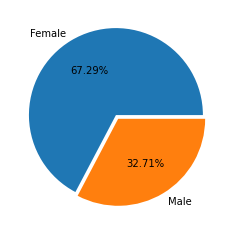

In [6]:
plt.pie(df.iloc[:,0].value_counts().values,labels=df.iloc[:,0].value_counts().index, autopct='%1.2f%%',explode=[0,.05])

 Conclusion: 32.17% are Male while 67.29% are females are doing online shooping

# Age

In [46]:
df.iloc[:,1].value_counts()

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

([<matplotlib.patches.Wedge at 0x2055e06a430>,
 [Text(0.6434418568672388, 0.8921785565856423, '31-40 years'),
  Text(-1.0417091621847836, 0.3533299045089115, '21-30 years'),
  Text(-0.1727121561881069, -1.0863565303825697, '41-50 yaers'),
  Text(0.8571466477589428, -0.6894197736035768, 'Less than 20 years'),
  Text(1.0730299554841816, -0.2420882372888358, '51 years and above')],
 [Text(0.3509682855639484, 0.4866428490467139, '30.11%'),
  Text(-0.5682049975553365, 0.19272540245940625, '29.37%'),
  Text(-0.0942066306480583, -0.5925581074814016, '26.02%'),
  Text(0.46753453514124144, -0.37604714923831456, '7.43%'),
  Text(0.5852890666277353, -0.13204812943027405, '7.06%')])

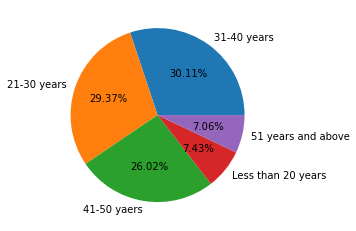

In [49]:
plt.pie(df.iloc[:,1].value_counts().values, labels=df.iloc[:,1].value_counts().index, autopct='%1.2f%%',)

# Which City

In [50]:
df.iloc[:,2].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

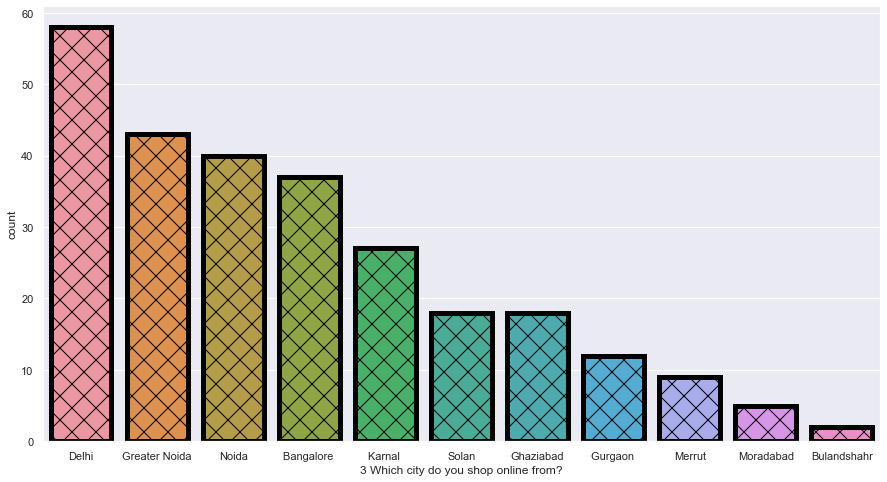

In [54]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.countplot(df.iloc[:,2], order=df.iloc[:,2].value_counts().index, lw=5, ec='black', hatch='x')

# Pin code

In [55]:
df.iloc[:,3].unique()

array([110009, 110030, 201308, 132001, 530068, 110011, 110018, 173229,
       110039, 244001, 122018, 201310, 560037, 203207, 250001, 201005,
       110044, 201306, 560010, 201305, 110042, 132036, 560018, 110008,
       560002, 201303, 201312, 203202, 560001, 201304, 560003, 110014,
       560013, 173212, 122009, 201009, 201008, 201001, 203001],
      dtype=int64)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '201308'),
  Text(1, 0, '132001'),
  Text(2, 0, '201310'),
  Text(3, 0, '110044'),
  Text(4, 0, '250001'),
  Text(5, 0, '173229'),
  Text(6, 0, '173212'),
  Text(7, 0, '560010'),
  Text(8, 0, '132036'),
  Text(9, 0, '122018')])

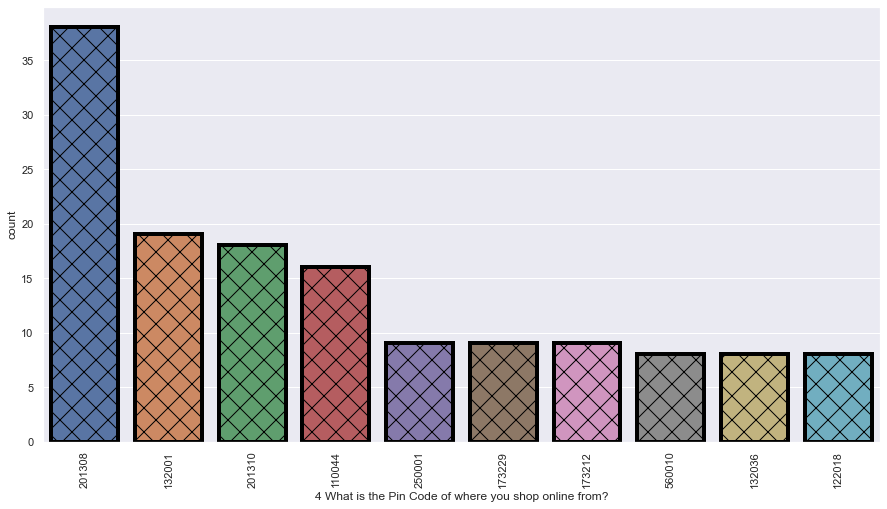

In [57]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.countplot(df.iloc[:,3], order=df.iloc[:,3].value_counts().index[:10], lw=4, ec='black', hatch='x')
plt.xticks(rotation=90)

In [7]:
col1=['5 Since How Long You are Shopping Online ?',
 '6 How many times you have made an online purchase in the past 1 year?',
 '7 How do you access the internet while shopping on-line?',
 '8 Which device do you use to access the online shopping?',
 '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
 '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
 '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
 '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
 '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
 '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
 '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ',
 '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
 '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ',
 '18 The content on the website must be easy to read and understand',
 '19 Information on similar product to the one highlighted  is important for product comparison',
 '20 Complete information on listed seller and product being offered is important for purchase decision.',
 '21 All relevant information on listed products must be stated clearly',
 '22 Ease of navigation in website',
 '23 Loading and processing speed',
 '24 User friendly Interface of the website',
 '25 Convenient Payment methods',
 '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
 '27 Empathy (readiness to assist with queries) towards the customers',
 '28 Being able to guarantee the privacy of the customer',
 '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
 '30 Online shopping gives monetary benefit and discounts',
 '31 Enjoyment is derived from shopping online',
 '32 Shopping online is convenient and flexible',
 '33 Return and replacement policy of the e-tailer is important for purchase decision',
 '34 Gaining access to loyalty programs is a benefit of shopping online',
 '35 Displaying quality Information on the website improves satisfaction of customers',
 '36 User derive satisfaction while shopping on a good quality website or application',
 '37 Net Benefit derived from shopping online can lead to users satisfaction',
 '38 User satisfaction cannot exist without trust',
 '39 Offering a wide variety of listed product in several category',
 '40 Provision of complete and relevant product information',
 '41 Monetary savings',
 '42 The Convenience of patronizing the online retailer',
 '43 Shopping on the website gives you the sense of adventure',
 '44 Shopping on your preferred e-tailer enhances your social status',
 '45 You feel gratification shopping on your favorite e-tailer',
 '46 Shopping on the website helps you fulfill certain roles',
 '47 Getting value for money spent',
 'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
 'Easy to use website or application',
 'Visual appealing web-page layout',
 'Wild variety of product on offer',
 'Complete, relevant description information of products',
 'Fast loading website speed of website and application',
 'Reliability of the website or application',
 'Quickness to complete purchase',
 'Availability of several payment options',
 'Speedy order delivery ',
 'Privacy of customers’ information',
 'Security of customer financial information',
 'Perceived Trustworthiness',
 'Presence of online assistance through multi-channel',
 'Longer time to get logged in (promotion, sales period)',
 'Longer time in displaying graphics and photos (promotion, sales period)',
 'Late declaration of price (promotion, sales period)',
 'Longer page loading time (promotion, sales period)',
 'Limited mode of payment on most products (promotion, sales period)',
 'Longer delivery period',
 'Change in website/Application design',
 'Frequent disruption when moving from one page to another',
 'Website is as efficient as before',
 'Which of the Indian online retailer would you recommend to a friend?']

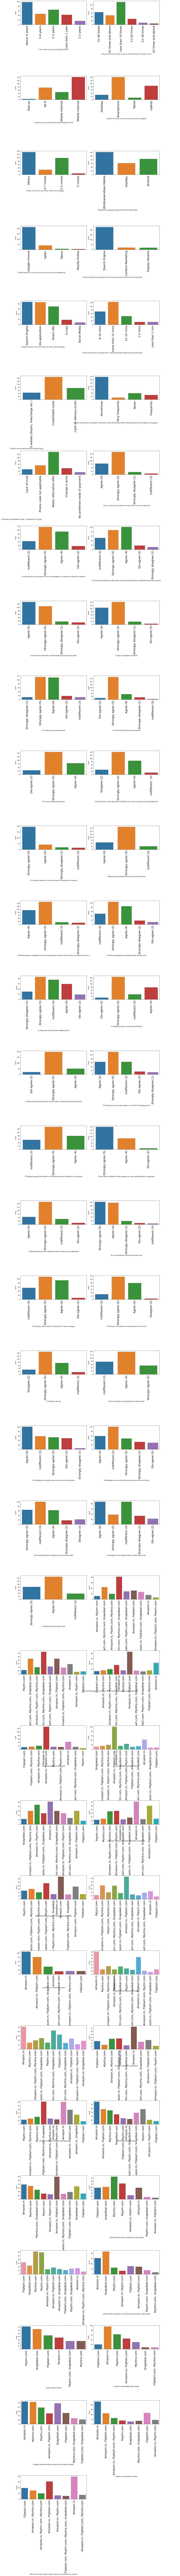

In [8]:
#checking countplots for the features in col1
plt.figure(figsize=(15,300))
for i in range(len(col1)):
    plt.subplot(40,2,i+1)
    sns.countplot(df[col1[i]])
    plt.xticks(rotation=90,fontsize=20)
    plt.tight_layout()

In [9]:
#Now We Are going to solve question

Now time to analyze the given points:

In [15]:
performance=['Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel']

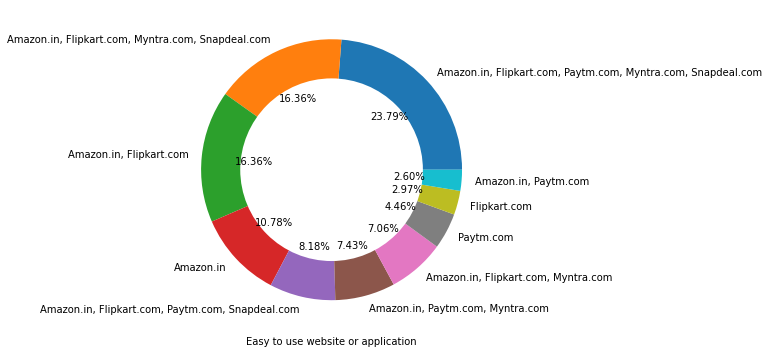

<Figure size 432x288 with 0 Axes>

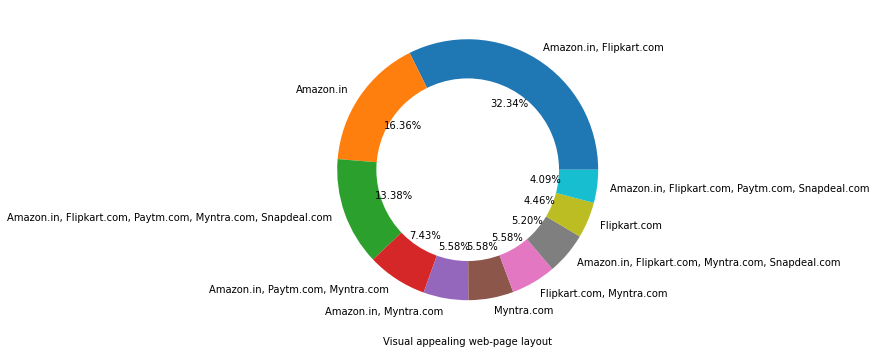

<Figure size 432x288 with 0 Axes>

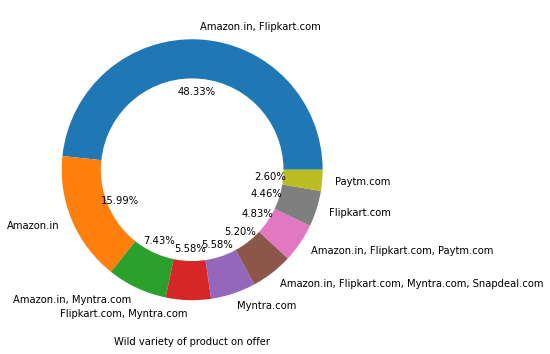

<Figure size 432x288 with 0 Axes>

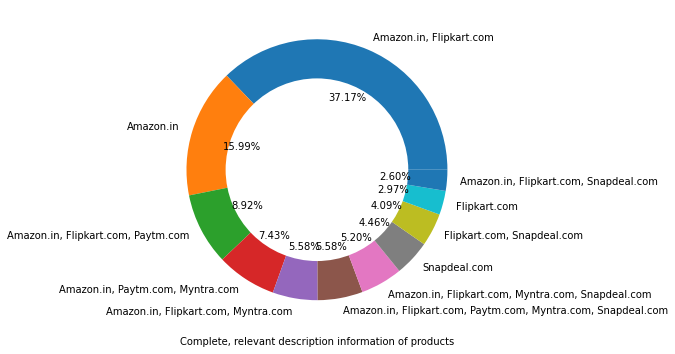

<Figure size 432x288 with 0 Axes>

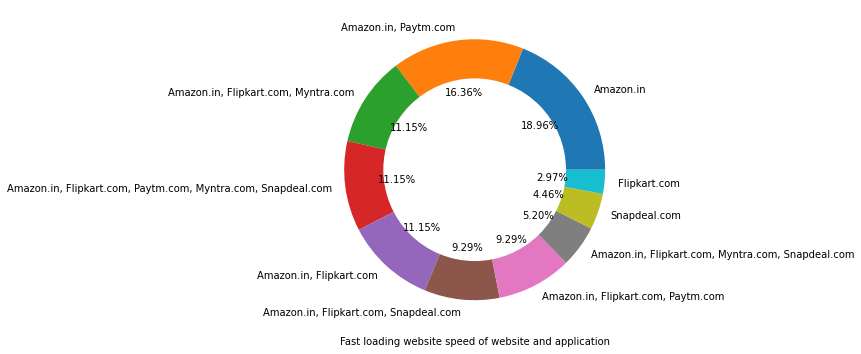

<Figure size 432x288 with 0 Axes>

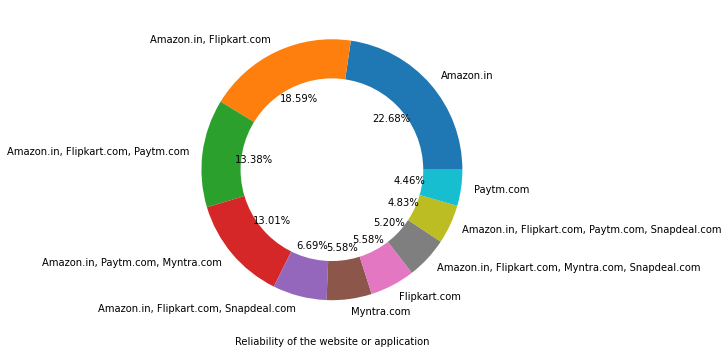

<Figure size 432x288 with 0 Axes>

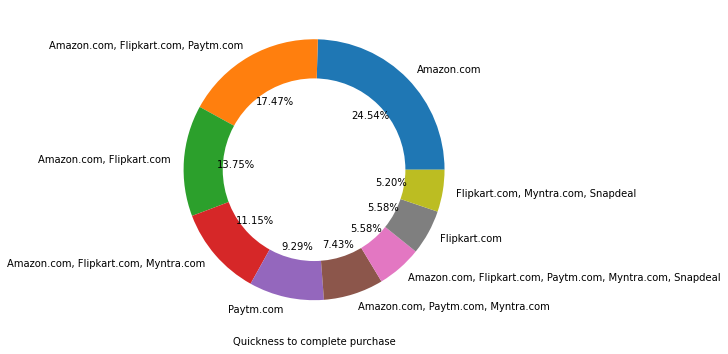

<Figure size 432x288 with 0 Axes>

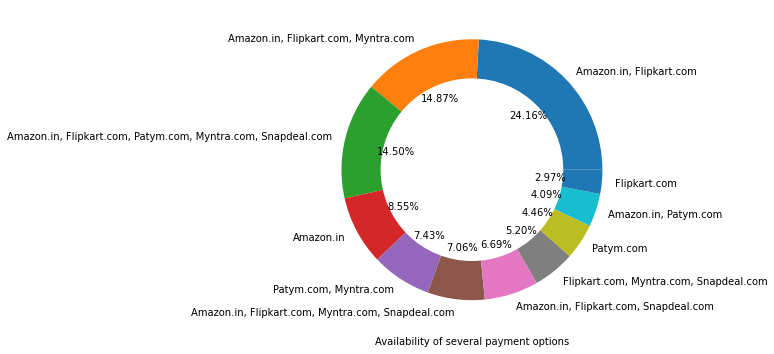

<Figure size 432x288 with 0 Axes>

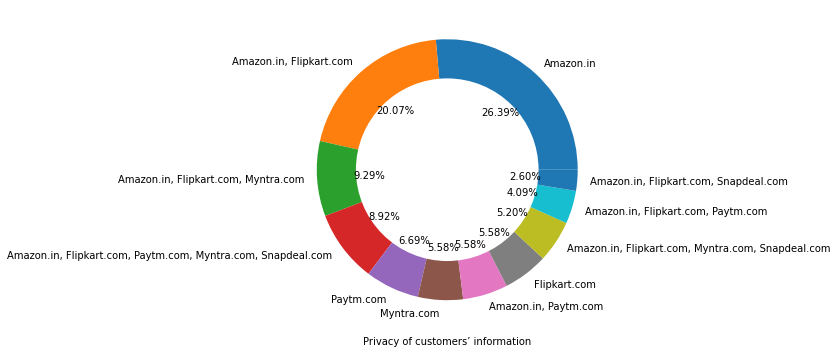

<Figure size 432x288 with 0 Axes>

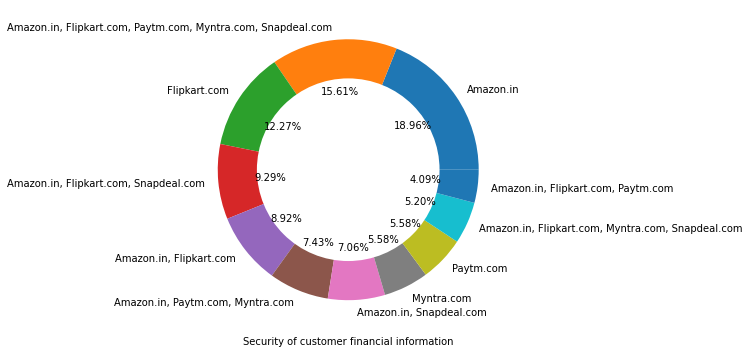

<Figure size 432x288 with 0 Axes>

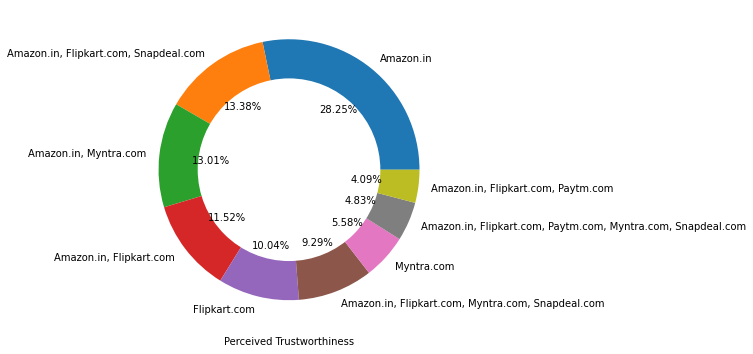

<Figure size 432x288 with 0 Axes>

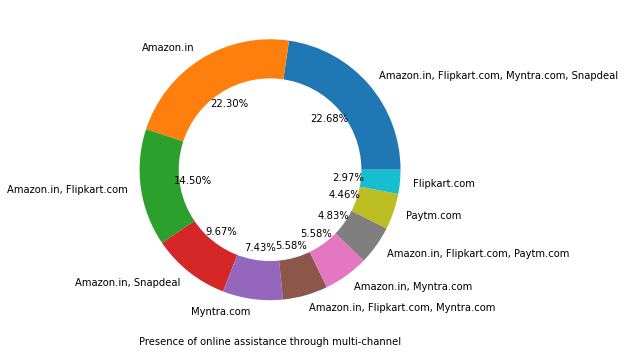

<Figure size 432x288 with 0 Axes>

In [17]:
for i in performance:
        plt.figure(figsize=(8,6))
        df[i].value_counts().plot.pie(autopct='%1.2f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

In [22]:
bad=['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another']

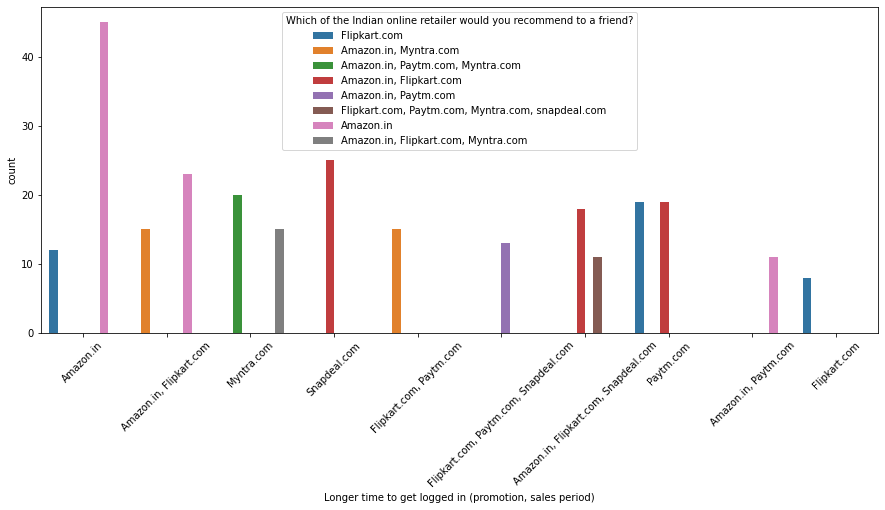

<Figure size 432x288 with 0 Axes>

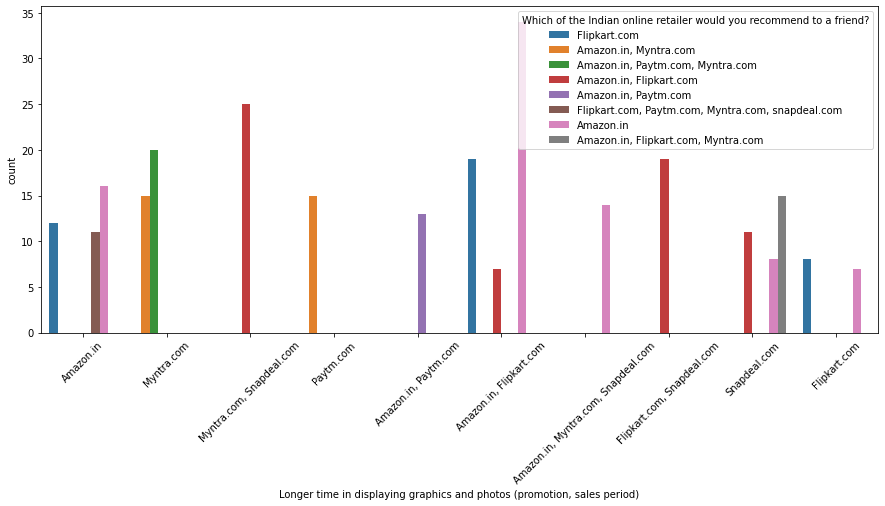

<Figure size 432x288 with 0 Axes>

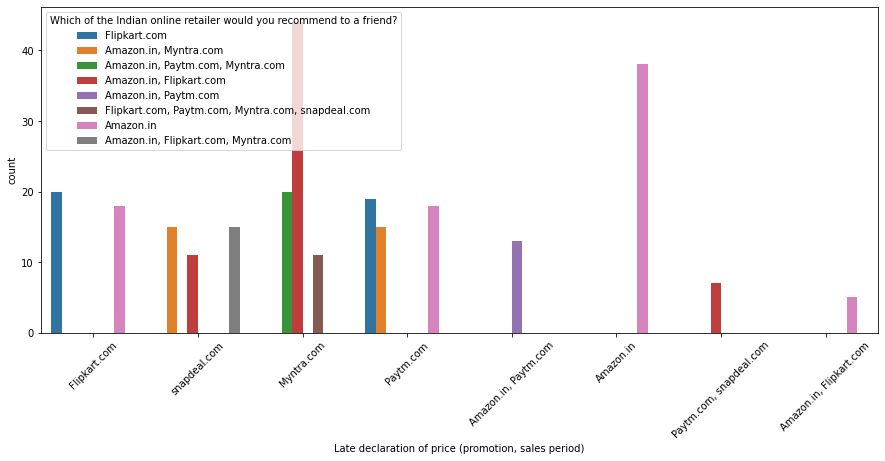

<Figure size 432x288 with 0 Axes>

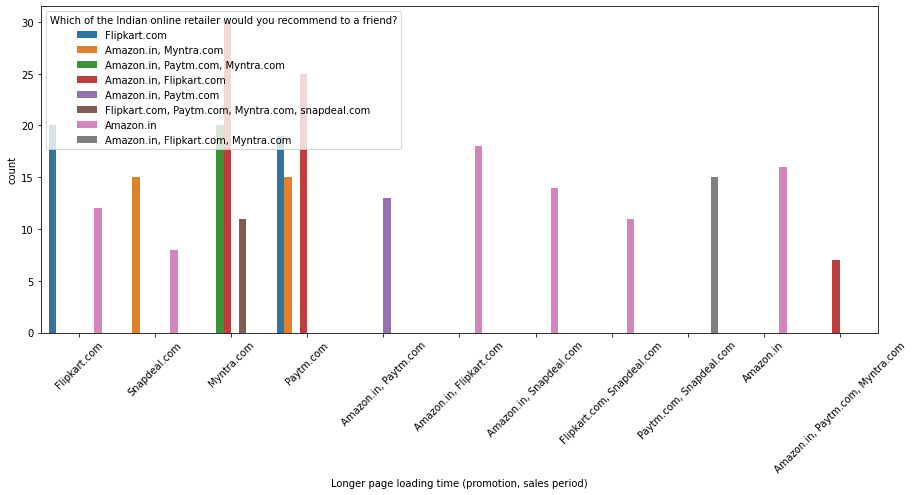

<Figure size 432x288 with 0 Axes>

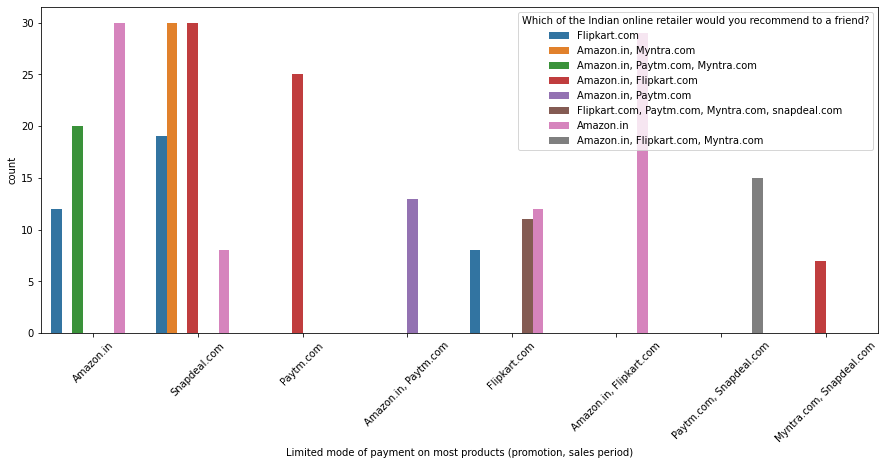

<Figure size 432x288 with 0 Axes>

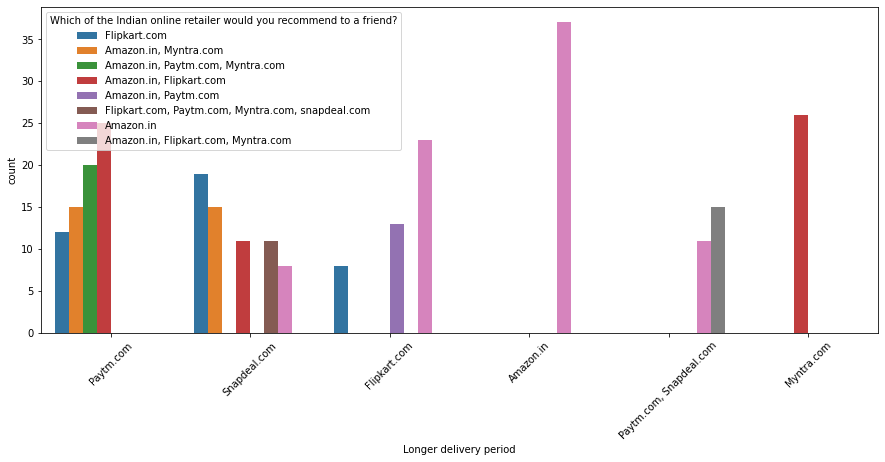

<Figure size 432x288 with 0 Axes>

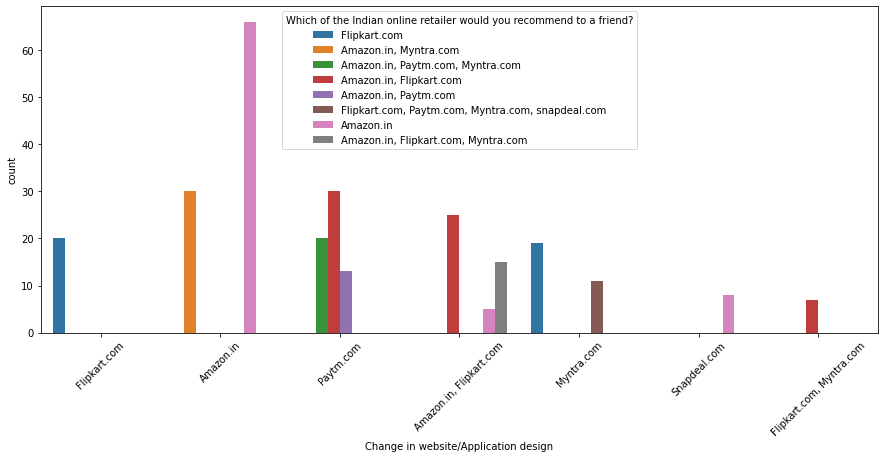

<Figure size 432x288 with 0 Axes>

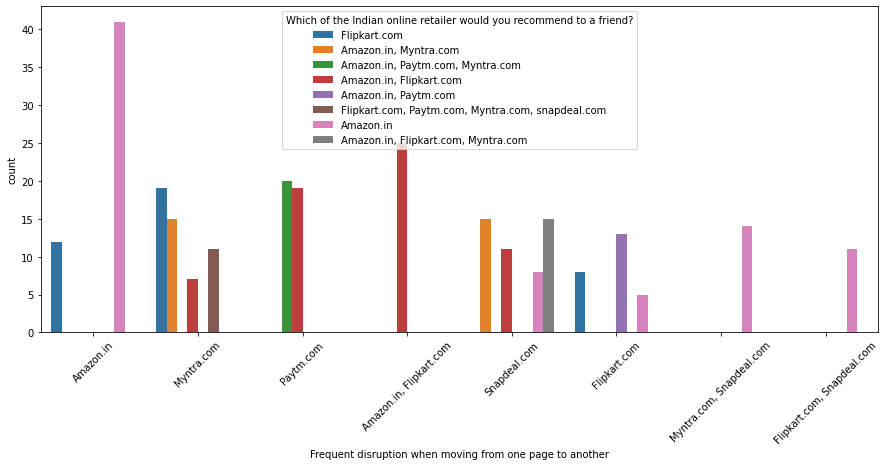

<Figure size 432x288 with 0 Axes>

In [23]:
for i in bad:
        plt.figure(figsize=(15,6))
        sns.countplot(df[i],hue=df['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()